# using tensorflow 1.14.0

In [ ]:
#!pip install tensorflow==1.14.0

# **importing the required libraries**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.metrics import roc_curve, auc
import math
from scipy.stats import pearsonr
import copy
from sklearn import preprocessing
from numpy import int64
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import csv
from sklearn import metrics
import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn import utils
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# loading the dataset

In [ ]:
df = pd.read_csv("/content/crime_prep.csv")
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,...,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,...,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,...,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,...,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,...,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


# **Data Cleaning**

Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
In this case the mean of the features is taken for the missing values.

In [ ]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,...,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.130000,0.940000,0.930000,0.03000,0.070000,0.100000,0.070000,0.020000,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.67,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,...,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.43,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,...,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.12,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,...,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.03,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,...,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


# Standardise v_cont_0, v_cat_0, v_cat_1 columns

In [ ]:
# Encoding the data to make it fit for any algorithm
lab_enc = preprocessing.LabelEncoder()
df['v_cat_0'] = lab_enc.fit_transform(df['v_cat_0'].values.reshape(-1, 1))
df['v_cat_1'] = lab_enc.fit_transform(df['v_cat_1'].values.reshape(-1, 1))
df['v_cont_0'] = lab_enc.fit_transform(df['v_cont_0'].values.reshape(-1, 1))
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,5,27,377,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,...,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.130000,0.940000,0.930000,0.03000,0.070000,0.100000,0.070000,0.020000,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.67,42,27,377,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,...,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.43,18,27,377,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,...,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.12,25,2,736,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,...,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.03,33,45,54,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,...,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


In [ ]:
# Removing the leading and trailing spaces in the resultant dataframe.
df.columns = df.columns.str.strip()

In [ ]:

# Descriptive statistics
df.describe()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,v_cont_39,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.237979,21.877633,24.084754,386.008526,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,...,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.220470,0.134859,0.114859,0.259185,0.075549,0.556050,0.305987,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078
std,0.232985,13.249547,15.334646,148.766419,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190960,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,...,0.219323,0.209278,0.248286,0.213404,0.169500,0.187274,0.192593,0.102607,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.055219,0.063883,0.052827,0.061932,0.064682,0.065758,0.078764,0.063888,0.090599,0.088441,0.094378,0.078367,0.090814,0.090137,0.047995,0.081159,0.090628,0.109459,0.203092,0.229055,0.085793,0.056005,0.085459,0.162099,0.240328,0.065796
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,9.00000

In [ ]:
# Check if there are Null values 
df.isnull().sum()

target        0
v_cont_0      0
v_cat_0       0
v_cat_1       0
v_cat_2       0
             ..
v_cont_122    0
v_cont_123    0
v_cont_124    0
v_cont_125    0
v_cont_126    0
Length: 128, dtype: int64

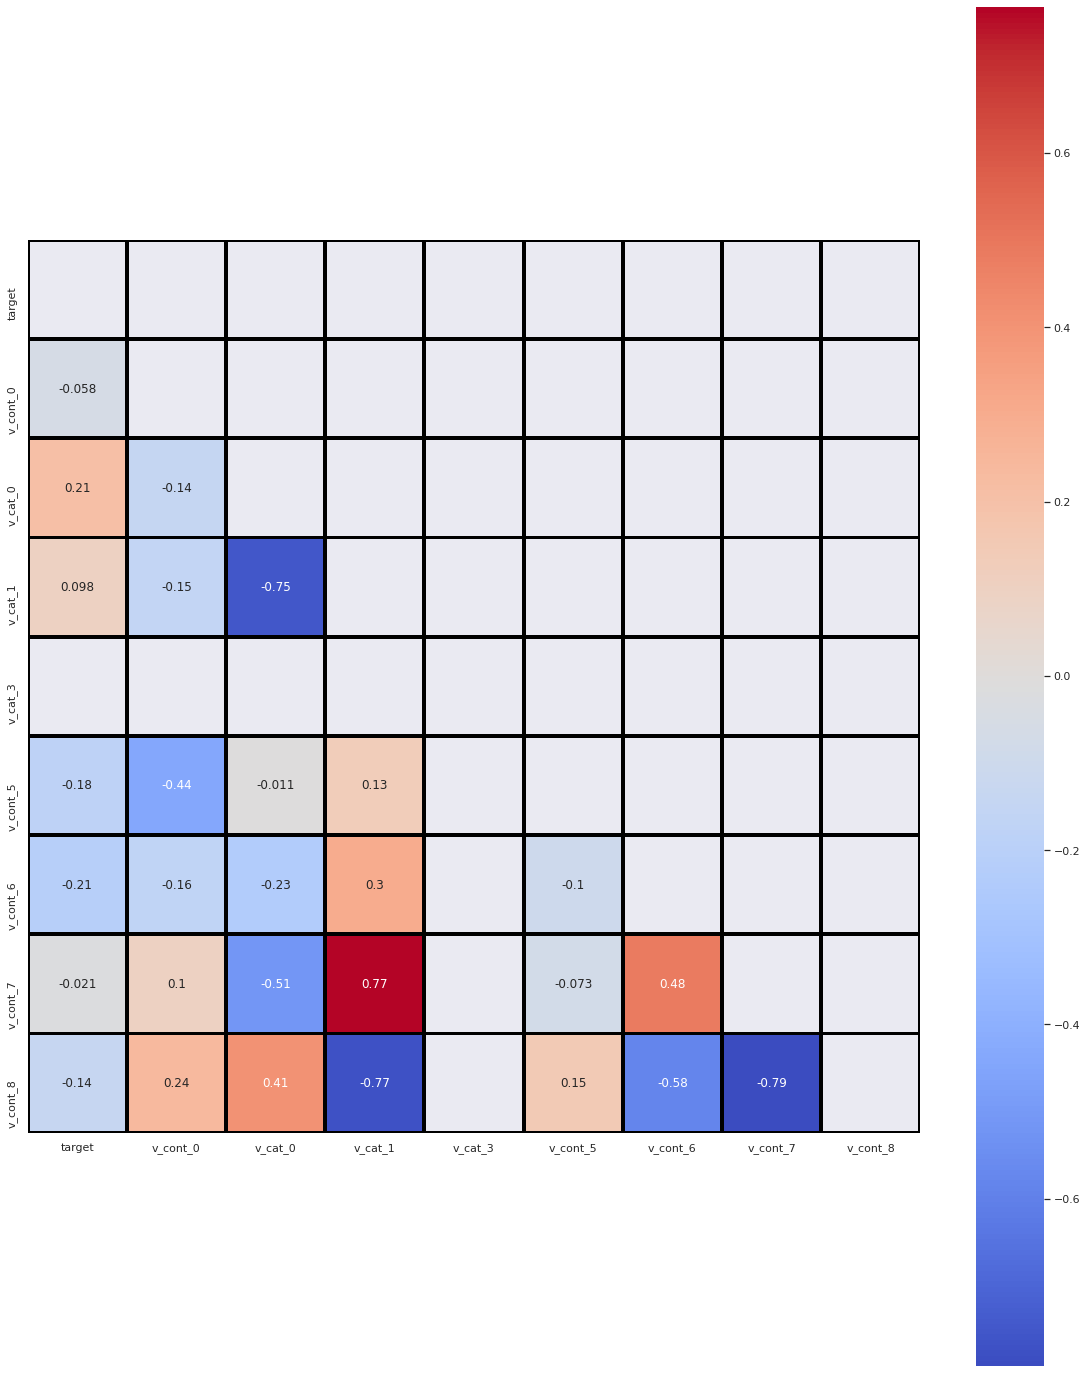

In [ ]:
#Create correlation matrix for all variables in the dataframe
sb.set(rc={'figure.figsize':(20,25)})
dff = df[:10][df.columns[:10]]
matrix = np.triu(dff.corr())
sb.heatmap(dff.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True, mask=matrix)

# Linear Regression

In [ ]:
# Selecting the DEPENDENT and INDEPENDENT  varables.
y = df['target']
x = df.drop(['target','v_cat_2','v_cont_7'], axis = 1)

In [ ]:
# Splitting the dataset into TRAIN and TEST data. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Linear regression using SKLearn Linear Regression method
from sklearn.linear_model import LinearRegression
#Build linear regression model
model = LinearRegression()
# Train the model, using training data set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(  mse)
r2score = r2_score(y_test, y_pred)
print("Mean squared error(MSE) = %.2f" %   mse)
print("Root Mean squared error(RMSE) = %.2f" % rmse)
print('R2 score = %.2f' % r2score)

Intercept = 1.8068288817630247
Coefficients =  [-3.57336856e-02 -2.71211279e-02 -2.06055580e-02 -1.56746740e-02
  1.29651587e-01  6.89806268e-02 -2.16128213e-01 -8.57498778e-02
  1.99748383e-02  1.44190725e-01 -2.00905662e-01 -1.65642728e-01
  1.11632295e-01 -1.05252540e-01  4.38674288e-02 -3.95744640e-01
 -1.00681309e-01  2.54817449e-02 -1.42032464e-01  1.31087929e-01
  4.14054494e-02 -8.00663819e-02  4.21098269e-01  1.06610789e-01
 -2.65568383e-01 -3.69865086e-02 -2.41290113e-02  3.66356191e-02
  2.62431284e-02  2.01786927e-02  4.72686840e-02 -1.70944857e-01
 -6.82160093e-02  2.00513156e-03  8.91069585e-03  1.93736413e-02
  3.06307631e-01 -6.13572963e-02 -4.98536458e-02  9.06377246e-02
  1.72987389e-01  3.58860058e-01  1.52533752e-01 -1.78500039e-02
 -3.16554729e-01 -8.57698469e-03 -1.35105603e-01 -3.00768996e-01
  2.96488966e-02 -1.43421738e-02  8.53049985e-02 -2.27064259e-01
 -1.40233817e-01  1.30696842e-01 -1.44336323e-01 -3.75853099e-02
  1.13989143e-01 -1.30319454e-01  7.7189797

# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Handling the continous values in dataset(converting to categorical values)
df = df.drop('v_cat_2',axis=1)
df = df.round(0).astype(int)
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,v_cont_39,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Check if there are Null values 
df.isnull().sum()

target        0
v_cont_0      0
v_cat_0       0
v_cat_1       0
v_cat_3       0
             ..
v_cont_122    0
v_cont_123    0
v_cont_124    0
v_cont_125    0
v_cont_126    0
Length: 127, dtype: int64

In [ ]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,v_cont_39,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Encoding the data to make it fit for any algorithm
df['v_cat_0'] = lab_enc.fit_transform(df['v_cat_0'].values.reshape(-1, 1))
df['v_cat_1'] = lab_enc.fit_transform(df['v_cat_1'].values.reshape(-1, 1))
df['v_cont_0'] = lab_enc.fit_transform(df['v_cont_0'].values.reshape(-1, 1))
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,v_cont_14,v_cont_15,v_cont_16,v_cont_17,v_cont_18,v_cont_19,v_cont_20,v_cont_21,v_cont_22,v_cont_23,v_cont_24,v_cont_25,v_cont_26,v_cont_27,v_cont_28,v_cont_29,v_cont_30,v_cont_31,v_cont_32,v_cont_33,v_cont_34,v_cont_35,v_cont_36,v_cont_37,v_cont_38,v_cont_39,...,v_cont_87,v_cont_88,v_cont_89,v_cont_90,v_cont_91,v_cont_92,v_cont_93,v_cont_94,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_101,v_cont_102,v_cont_103,v_cont_104,v_cont_105,v_cont_106,v_cont_107,v_cont_108,v_cont_109,v_cont_110,v_cont_111,v_cont_112,v_cont_113,v_cont_114,v_cont_115,v_cont_116,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['target', 'v_cont_0', 'v_cat_0', 'v_cat_1', 'v_cat_3', 'v_cont_5',
       'v_cont_6', 'v_cont_7', 'v_cont_8', 'v_cont_9',
       ...
       'v_cont_117', 'v_cont_118', 'v_cont_119', 'v_cont_120', 'v_cont_121',
       'v_cont_122', 'v_cont_123', 'v_cont_124', 'v_cont_125', 'v_cont_126'],
      dtype='object', length=127)

In [ ]:
# Selecting the DEPENDENT  and  INDEPENDENT variables.
y = df['target']
x = df.drop(['target','v_cont_7'], axis = 1)

In [ ]:
# Splitting the dataset into TRAIN and TEST .
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


In [ ]:
print("Accuracy % = :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy % = : 84.21052631578947


# **Optimizing the algorithm for more performance**

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9097744360902256


In [ ]:
print("Accuracy % :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy % : 90.97744360902256


# **Deplying the ML model into the local disk** i.e. saving

In [ ]:
import joblib

In [ ]:
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

# **Using the saved model for prediction**

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.9097744360902256
